In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os.path
import urllib.request 

In [28]:
#Define the data directory and file paths
#Create a directory for data if it doesn't exist
DATA_DIR = "data/"
os.makedirs(DATA_DIR, exist_ok=True)

ATAC_SEQ_PATH = os.path.join(DATA_DIR, "ImmGenATAC18_AllOCRsInfo.csv")
RNA_SEQ_PATH = os.path.join(DATA_DIR, "mmc2.csv")
MMC1_PATH = os.path.join(DATA_DIR, "mmc1.xlsx")
REFFLAT_PATH = os.path.join(DATA_DIR, "refFlat.txt.gz")

#Check if data files are already downloaded and if not, download them
#ATAC-seq
if not os.path.isfile(ATAC_SEQ_PATH):
    urllib.request.urlretrieve("https://sharehost.hms.harvard.edu/immgen/ImmGenATAC18_AllOCRsInfo.csv", ATAC_SEQ_PATH)

#RNA-seq    
if not os.path.isfile(RNA_SEQ_PATH):
    urllib.request.urlretrieve("https://www.cell.com/cms/10.1016/j.cell.2018.12.036/attachment/4392da81-c56e-471a-b1df-0e72f03ecd77/mmc2.csv", RNA_SEQ_PATH)

if not os.path.isfile(MMC1_PATH):
    urllib.request.urlretrieve("https://www.cell.com/cms/10.1016/j.cell.2018.12.036/attachment/e5df7329-d77d-40b3-a03a-34bdbe4b402c/mmc1.xlsx", MMC1_PATH)
    
if not os.path.isfile(REFFLAT_PATH):
    urllib.request.urlretrieve("http://hgdownload.cse.ucsc.edu/goldenPath/mm10/database/refFlat.txt.gz", REFFLAT_PATH)

#Load the ATAC-seq data
atac = pd.read_csv(ATAC_SEQ_PATH, index_col=[0,1])
#atac.index.names = ["peakID", "chrom"]

#Load the RNA-seq data
rna = pd.read_csv(RNA_SEQ_PATH, index_col=0)

#Load the meta data
meta = pd.read_excel(MMC1_PATH)
meta = meta.set_index("SampleName")

#Load the annotation data
refFlat = pd.read_csv(REFFLAT_PATH, sep="\t", header=None, comment="#", compression="gzip")
refFlat.columns = ["geneName", "name", "chrom", "strand", "txStart", "txEnd",
    "cdsStart", "cdsEnd", "exonCount", "exonStarts", "exonEnds"]


c:\Users\luisw\miniconda3\envs\data_analysis\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


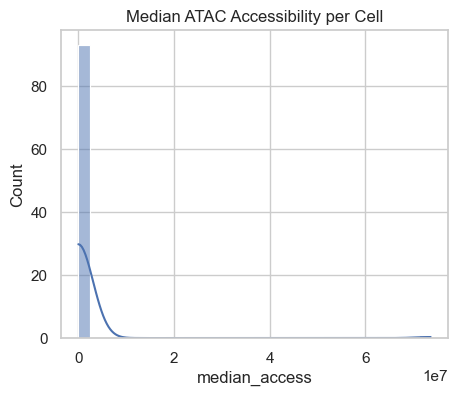

,mean_access,median_access,std_access,PF.reads,InputCellNumber
Summit,7.596866e+07,73646899.00,4.450542e+07,NaN,NaN
mm10.60way.phastCons_scores,1.646620e-01,0.08,2.034026e-01,NaN,NaN
_-log10_bestPvalue,inf,2.32,NaN,NaN,NaN
Included.in.systematic.analysis,1.000000e+00,1.00,0.000000e+00,NaN,NaN
LTHSC.34-.BM,3.868438e+00,0.41,1.000410e+01,NaN,NaN
...,...,...,...,...,...
FRC.SLN,3.998828e+00,1.47,9.808067e+00,NaN,NaN
IAP.SLN,3.987949e+00,1.40,9.614775e+00,NaN,NaN
BEC.SLN,3.983416e+00,1.54,9.709456e+00,NaN,NaN
LEC.SLN,3.976234e+00,1.57,9.715224e+00,NaN,NaN


In [29]:
sns.set_theme(style="whitegrid")

# 1. Compute per‐cell stats
cell_stats = pd.DataFrame({
    "mean_access":   atac.mean(axis=0, numeric_only=True),
    "median_access": atac.median(axis=0, numeric_only=True),
    "std_access":    atac.std(axis=0, numeric_only=True),
})
# join QC metrics
for col in ["PF.reads","InputCellNumber","TSS.enrichment"]:
    if col in meta.columns:
        cell_stats[col] = meta[col]

# 2. Visualize
plt.figure(figsize=(5,4))
sns.histplot(cell_stats["median_access"], bins=30, kde=True)
plt.title("Median ATAC Accessibility per Cell")
plt.show()
cell_stats

In [30]:

# 3. Correlation
print("Corr mean_access vs PF.reads:",
      cell_stats["mean_access"].corr(cell_stats.get("PF.reads")))
print("Corr mean_access vs InputCellNumber:",
      cell_stats["mean_access"].corr(cell_stats.get("InputCellNumber")))

Corr mean_access vs PF.reads: nan
Corr mean_access vs InputCellNumber: nan
